In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
import seaborn as sns
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Weekly.csv
/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Daily.csv
/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Monthly.csv


In [2]:
daily_df = pd.read_csv("/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Daily.csv")
weekly_df = pd.read_csv("/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Weekly.csv")
monthly_df = pd.read_csv("/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Monthly.csv")

In [3]:
daily_df.head(10)

,Unnamed: 0,Date,Price,High,Low,Close,Volume,Adj Close
0,0,2013-04-15,19.67,19.94,19.44,19.57,98025876,19.57
1,1,2013-04-16,19.68,19.92,19.62,19.85,69610320,19.85
2,2,2013-04-17,19.69,19.79,19.47,19.58,81398520,19.58
3,3,2013-04-18,19.65,19.66,19.05,19.17,132767100,19.17
4,4,2013-04-19,19.25,20.11,19.18,20.02,231895872,20.02
5,5,2013-04-22,20.04,20.12,19.39,20.02,115220664,20.02
6,6,2013-04-23,20.05,20.41,20.03,20.22,91600308,20.22
7,7,2013-04-24,20.22,20.47,20.22,20.36,73090836,20.36
8,8,2013-04-25,20.43,20.43,20.21,20.25,79608312,20.25
9,9,2013-04-26,20.21,20.21,19.93,20.06,99408492,20.06


In [4]:
weekly_df.head(10)

,Unnamed: 0,Date,Price,High,Low,Close,Volume,Adj Close
0,0,2013-04-15,19.67,20.11,19.05,20.02,613697688,20.02
1,1,2013-04-22,20.04,20.47,19.39,20.06,458928612,20.06
2,2,2013-04-29,20.10,21.19,20.10,21.16,423312264,21.16
3,3,2013-05-06,21.23,22.04,21.23,22.03,426249324,22.03
4,4,2013-05-13,21.99,23.02,21.86,22.75,520091388,22.75
5,5,2013-05-20,22.65,23.04,21.80,21.85,455072472,21.85
6,6,2013-05-27,22.11,22.33,21.63,21.80,334105560,21.80
7,7,2013-06-03,21.85,22.02,21.20,22.02,467723808,22.02
8,8,2013-06-10,22.07,22.30,21.66,21.90,424179396,21.90
9,9,2013-06-17,22.00,22.79,21.85,22.05,582752664,22.05


In [5]:
monthly_df.head(10)

,Unnamed: 0,Date,Price,High,Low,Close,Volume,Adj Close
0,0,2013-05-01,20.60,23.04,20.43,21.80,1974715308,21.80
1,1,2013-06-01,21.85,22.79,21.20,22.03,1941280776,22.03
2,2,2013-07-01,22.18,23.22,21.91,22.22,2047770180,22.22
3,3,2013-08-01,22.40,22.77,21.16,21.19,1338144516,21.19
4,4,2013-09-01,21.38,22.67,21.37,21.92,1323615060,21.92
5,5,2013-10-01,22.03,26.06,21.10,25.79,2206771020,25.79
6,6,2013-11-01,25.82,26.73,25.15,26.52,1049213736,26.52
7,7,2013-12-01,26.61,28.05,26.25,28.05,1352374272,28.05
8,8,2014-01-01,27.91,29.69,27.08,29.55,2178287532,29.55
9,9,2014-02-01,29.51,30.75,28.23,30.42,1620230148,30.42


In [6]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2510 non-null   int64  
 1   Date        2510 non-null   object 
 2   Price       2510 non-null   float64
 3   High        2510 non-null   float64
 4   Low         2510 non-null   float64
 5   Close       2510 non-null   float64
 6   Volume      2510 non-null   int64  
 7   Adj Close   2510 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 157.0+ KB


In [7]:
daily_df.drop(['Unnamed: 0'],axis=1,inplace=True)
weekly_df.drop(['Unnamed: 0'],axis=1,inplace=True)
monthly_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
daily_df.rename(columns={'Price':'Open'},inplace=True)
weekly_df.rename(columns={'Price':'Open'},inplace=True)
monthly_df.rename(columns={'Price':'Open'},inplace=True)

In [9]:
daily_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2013-04-15,19.67,19.94,19.44,19.57,98025876,19.57
1,2013-04-16,19.68,19.92,19.62,19.85,69610320,19.85
2,2013-04-17,19.69,19.79,19.47,19.58,81398520,19.58
3,2013-04-18,19.65,19.66,19.05,19.17,132767100,19.17
4,2013-04-19,19.25,20.11,19.18,20.02,231895872,20.02


In [10]:
daily_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [11]:
daily_df.shape

(2510, 7)

In [12]:
def volume_analysis(df,cmp):
    plt.figure(figsize=(10,5))
    plt.plot(df['Date'],df['Volume'],c='blue')
    plt.title('Volume Of '+cmp+' Stock Traded')
    plt.ylabel('Volume')
    plt.show()

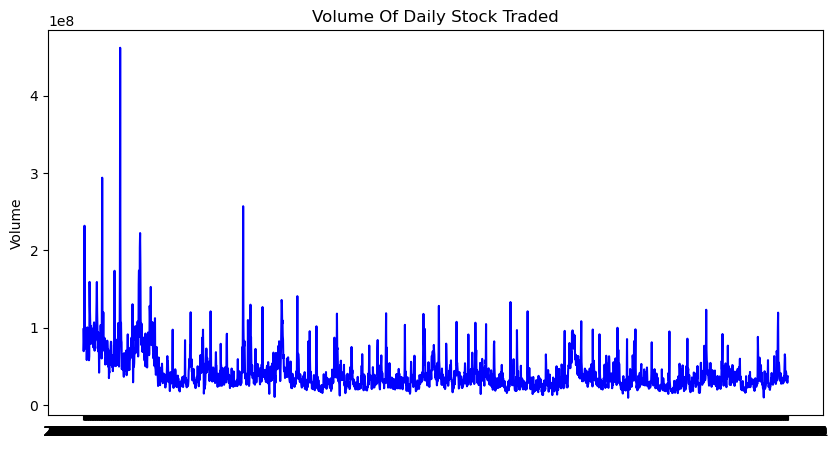

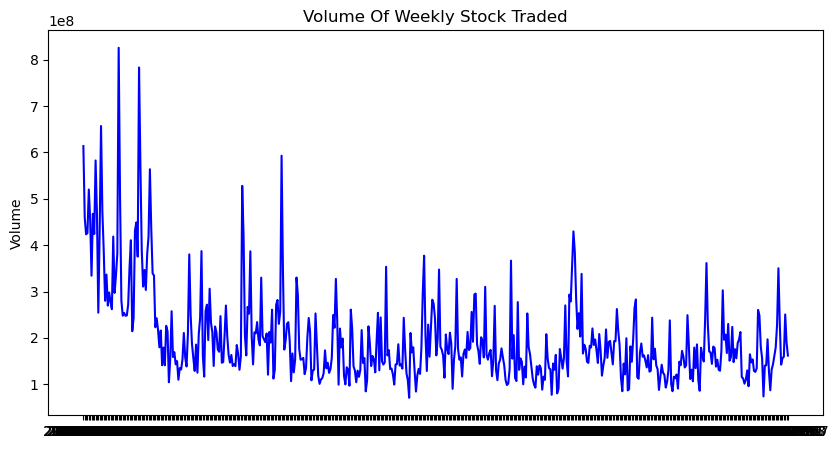

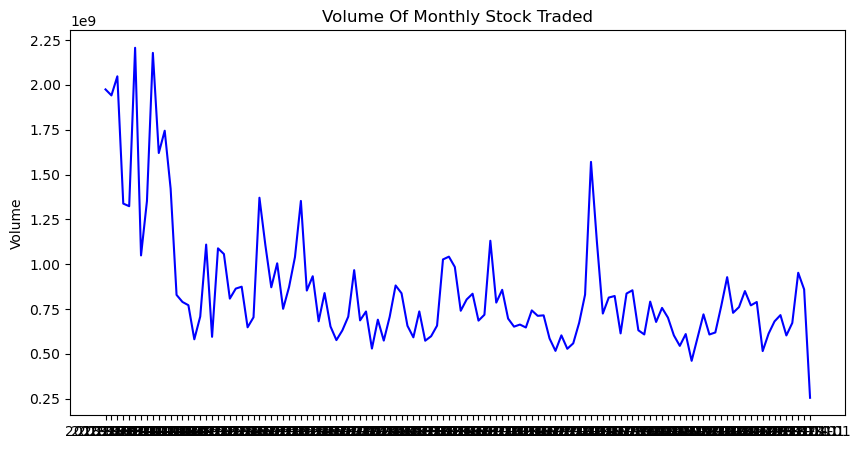

In [13]:
volume_analysis(daily_df,'Daily')
volume_analysis(weekly_df,'Weekly')
volume_analysis(monthly_df,'Monthly')

In [14]:
train, test = train_test_split(daily_df, test_size = 0.2)

In [15]:
test_pred = test.copy()

In [16]:
train.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
848,2016-08-24,39.84,39.92,39.54,39.68,25672000,39.68
2196,2021-12-31,146.05,146.70,144.85,144.85,18136000,144.85
1127,2017-10-03,48.38,48.62,48.14,48.60,21666000,48.60
1725,2020-02-20,75.95,76.35,75.21,75.85,25962000,75.85
2218,2022-02-02,151.25,151.55,145.52,148.00,123200000,148.00
891,2016-10-25,41.92,41.92,41.26,41.43,37814000,41.43
2472,2023-02-07,103.22,108.18,103.12,107.64,49010200,107.64
1792,2020-05-27,71.00,71.27,69.73,71.01,31684000,71.01
974,2017-02-24,42.38,42.42,42.15,42.39,26924000,42.39
811,2016-07-01,35.26,35.63,35.19,35.51,30984000,35.51


In [17]:
test.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
428,2014-12-23,26.73,27.11,26.69,26.94,57544000,26.94
864,2016-09-16,39.95,39.95,39.68,39.90,42612000,39.90
819,2016-07-14,36.70,36.81,36.53,36.79,21408000,36.79
1481,2019-03-04,57.73,58.28,56.91,57.67,35490000,57.67
1238,2018-03-14,57.29,57.99,57.12,57.44,41870000,57.44
2254,2022-03-25,141.92,142.04,139.74,141.67,24126000,141.67
1186,2017-12-27,53.33,53.41,52.92,53.01,22324000,53.01
845,2016-08-19,39.99,40.06,39.84,39.98,22416000,39.98
190,2014-01-14,28.48,28.80,28.23,28.76,99204696,28.76
2206,2022-01-14,137.08,140.74,137.00,139.48,29662000,139.48


In [18]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [19]:
y_train = train['Close'].values
y_test = test['Close'].values

In [20]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = model_lnr.predict(x_test)

In [22]:
result = model_lnr.predict([[19.67,19.94,19.44,98025876]])
print(result)

[19.69430188]


In [23]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 0.203
RMSE 0.45
MAE 0.282
MAPE 0.004
R2 Score :  1.0
